<a href="https://colab.research.google.com/github/youngbinYoon/DeepLearning_Keras/blob/master/PantsModel_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.5'

In [0]:
import tensorflow as tf
tf.__version__

'1.15.0'

In [0]:
import os, shutil

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
# 소규모 데이터셋을 저장할 디렉터리
base_dir = '/content/drive/My Drive/KerasTask/data/pants'

# 훈련, 검증, 테스트 분할을 위한 디렉터리
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [0]:
# 학습용 디렉터리
train_jean_dark_plain = os.path.join(train_dir, 'bottom_jean_dark_plain')
train_jean_light_plain = os.path.join(train_dir, 'bottom_jean_light_plain')
train_pants_black_plain = os.path.join(train_dir, 'bottom_pants_black_plain')
train_pants_brown_plain = os.path.join(train_dir, 'bottom_pants_brown_plain')
train_pants_green_plain = os.path.join(train_dir, 'bottom_pants_green_plain')
train_pants_grey_plain = os.path.join(train_dir, 'bottom_pants_grey_plain')
train_pants_white_plain = os.path.join(train_dir, 'bottom_pants_white_plain')

print('훈련 bottom_jean_dark_plain:', len(os.listdir(train_jean_dark_plain)))
print('훈련 bottom_jean_light_plain:', len(os.listdir(train_jean_light_plain)))
print('훈련 bottom_pants_black_plain:', len(os.listdir(train_pants_black_plain)))
print('훈련 bottom_pants_brown_plain:', len(os.listdir(train_pants_brown_plain)))
print('훈련 bottom_pants_green_plain:', len(os.listdir(train_pants_green_plain)))
print('훈련 bottom_pants_grey_plain:', len(os.listdir(train_pants_grey_plain)))
print('훈련 bottom_pants_white_plain:', len(os.listdir(train_pants_white_plain)))

훈련 bottom_jean_dark_plain: 132
훈련 bottom_jean_light_plain: 55
훈련 bottom_pants_black_plain: 94
훈련 bottom_pants_brown_plain: 44
훈련 bottom_pants_green_plain: 43
훈련 bottom_pants_grey_plain: 47
훈련 bottom_pants_white_plain: 52


In [0]:
# 검증용 고양이 사진 디렉터리
validation_jean_dark_plain = os.path.join(validation_dir, 'bottom_jean_dark_plain')
validation_jean_light_plain = os.path.join(validation_dir, 'bottom_jean_light_plain')
validation_pants_black_plain = os.path.join(validation_dir, 'bottom_pants_black_plain')
validation_pants_brown_plain = os.path.join(validation_dir, 'bottom_pants_brown_plain')
validation_pants_green_plain = os.path.join(validation_dir, 'bottom_pants_green_plain')
validation_pants_grey_plain = os.path.join(validation_dir, 'bottom_pants_grey_plain')
validation_pants_white_plain = os.path.join(validation_dir, 'bottom_pants_white_plain')


# 테스트용 고양이 사진 디렉터리
test_jean_dark_plain = os.path.join(test_dir, 'bottom_jean_dark_plain')
test_jean_light_plain = os.path.join(test_dir, 'bottom_jean_light_plain')
test_pants_black_plain = os.path.join(test_dir, 'bottom_pants_black_plain')
test_pants_brown_plain = os.path.join(test_dir, 'bottom_pants_brown_plain')
test_pants_green_plain = os.path.join(test_dir, 'bottom_pants_green_plain')
test_pants_grey_plain = os.path.join(test_dir, 'bottom_pants_grey_plain')
test_pants_white_plain = os.path.join(test_dir, 'bottom_pants_white_plain')

print('검증 bottom_jean_dark_plain:', len(os.listdir(validation_jean_dark_plain)))
print('검증 bottom_jean_light_plain:', len(os.listdir(validation_jean_light_plain)))
print('검증 bottom_pants_black_plain:', len(os.listdir(validation_pants_black_plain)))
print('검증 bottom_pants_brown_plain:', len(os.listdir(validation_pants_brown_plain)))
print('검증 bottom_pants_green_plain:', len(os.listdir(validation_pants_green_plain)))
print('검증 bottom_pants_grey_plain:', len(os.listdir(validation_pants_grey_plain)))
print('검증 bottom_pants_white_plain:', len(os.listdir(validation_pants_white_plain)))

print('테스트 bottom_jean_dark_plain:', len(os.listdir(test_jean_dark_plain)))
print('테스트 bottom_jean_light_plain:', len(os.listdir(test_jean_light_plain)))
print('테스트 bottom_pants_black_plain:', len(os.listdir(test_pants_black_plain)))
print('테스트 bottom_pants_brown_plain:', len(os.listdir(test_pants_brown_plain)))
print('테스트 bottom_pants_green_plain:', len(os.listdir(test_pants_green_plain)))
print('테스트 bottom_pants_grey_plain:', len(os.listdir(test_pants_grey_plain)))
print('테스트 bottom_pants_white_plain:', len(os.listdir(test_pants_white_plain)))


검증 bottom_jean_dark_plain: 20
검증 bottom_jean_light_plain: 20
검증 bottom_pants_black_plain: 20
검증 bottom_pants_brown_plain: 20
검증 bottom_pants_green_plain: 20
검증 bottom_pants_grey_plain: 20
검증 bottom_pants_white_plain: 20
테스트 bottom_jean_dark_plain: 11
테스트 bottom_jean_light_plain: 11
테스트 bottom_pants_black_plain: 11
테스트 bottom_pants_brown_plain: 11
테스트 bottom_pants_green_plain: 11
테스트 bottom_pants_grey_plain: 11
테스트 bottom_pants_white_plain: 11


In [0]:
from keras.applications import ResNet50
from keras.layers import Dense, Input, Activation
from keras.models import Model
from keras.callbacks import EarlyStopping
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization

In [0]:
conv_base = ResNet50(weights = 'imagenet',
                    include_top = False,
                    input_shape = (150,150,3))


/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 4s 0us/step


In [0]:
conv_base.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 75, 75, 64)   256         conv1[0][0]                      
___________________________________________________________________________________________

In [0]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 5, 5, 2048)        23587712  
_________________________________________________________________
flatten_1 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               13107456  
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 1799      
Total params: 36,696,967
Trainable params: 36,643,847
Non-trainable params: 53,120
_________________________________________________________________


In [0]:
print('conv_base를 동결하기 전 훈련되는 가중치의 수:', 
      len(model.trainable_weights))
conv_base.trainable = False
print('conv_base를 동결한 후 훈련되는 가중치의 수:', 
      len(model.trainable_weights))

conv_base를 동결하기 전 훈련되는 가중치의 수: 216
conv_base를 동결한 후 훈련되는 가중치의 수: 4


In [0]:
from keras.applications import ResNet50
from keras.layers import Dense, Input, Activation
from keras.models import Model
from keras.callbacks import EarlyStopping
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization

In [18]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# 검증 데이터는 증식되어서는 안 됩니다!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지의 크기를 150 × 150로 변경합니다
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=200,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Found 467 images belonging to 7 classes.
Found 140 images belonging to 7 classes.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/100
 - 297s - loss: 0.4284 - acc: 0.8556 - val_loss: 2.1977 - val_acc: 0.0571
Epoch 2/100
 - 84s - loss: 0.1450 - acc: 0.9510 - val_loss: 2.2334 - val_acc: 0.1000
Epoch 3/100
 - 86s - loss: 0.1210 - acc: 0.9573 - val_loss: 2.2758 - val_acc: 0.1500
Epoch 4/100
 - 83s - loss: 0.0888 - acc: 0.9714 - val_loss: 2.3665 - val_acc: 0.0929
Epoch 5/100
 - 84s - loss: 0.0829 - acc: 0.9708 - val_loss: 2.5018 - val_acc: 0.0357
Epoch 6/100
 - 86s - loss: 0.0691 - acc: 0.9764 - val_loss: 2.5330 - val_acc: 0.0357
Epoch 7/100
 - 83s - loss: 0.0576 - acc: 0.9802 - val_loss: 2.6433 - val_acc: 0.1143
Epoch 8/100
 - 83s - loss: 0.0462 - acc: 0.9839 - val_loss: 2.8638 - val_acc: 0.1429
Epoch 9/100
 - 87s - loss: 0.0601 - acc: 0.9822 - val_loss: 2.7941 - val_acc: 0.1429
Epoch 10/100
 - 83s - loss: 0.0541 - acc: 0.9827 - val

In [0]:
model.save('/content/drive/My Drive/KerasTask/data/1203_pantsmodel.h5')

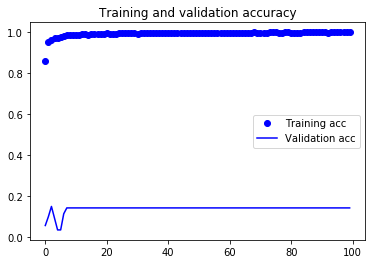

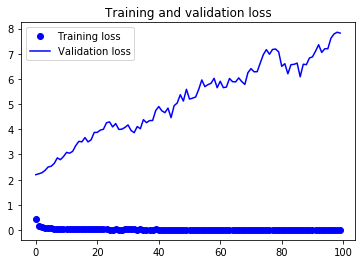

In [20]:

import matplotlib as mpl
import matplotlib.pylab as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [21]:
conv_base.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 75, 75, 64)   256         conv1[0][0]                      
___________________________________________________________________________________________

In [0]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False


In [23]:

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=200,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/100
200/200 [==============================] - 94s 471ms/step - loss: 0.0074 - acc: 0.9979 - val_loss: 1.3533 - val_acc: 0.8643
Epoch 2/100
200/200 [==============================] - 87s 433ms/step - loss: 0.0127 - acc: 0.9974 - val_loss: 1.3294 - val_acc: 0.8643
Epoch 3/100
200/200 [==============================] - 90s 449ms/step - loss: 0.0039 - acc: 0.9983 - val_loss: 1.3421 - val_acc: 0.8714
Epoch 4/100
200/200 [==============================] - 87s 436ms/step - loss: 0.0046 - acc: 0.9983 - val_loss: 1.1577 - val_acc: 0.8643
Epoch 5/100
200/200 [==============================] - 87s 437ms/step - loss: 0.0052 - acc: 0.9980 - val_loss: 1.3957 - val_acc: 0.8500
Epoch 6/100
200/200 [==============================] - 90s 448ms/step - loss: 0.0037 - acc: 0.9989 - val_loss: 1.5192 - val_acc: 0.8571
Epoch 7/100
200/200 [==============================] - 87s 436ms/step - loss: 0.0025 - acc: 0.9992 - val_loss: 1.5015 - val_acc: 0.8500
Epoch 8/100
200/200 [===========================

In [0]:
model.save('1204_pantmodel_2.h5')

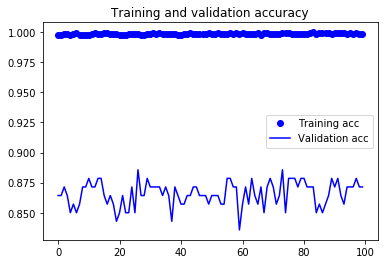

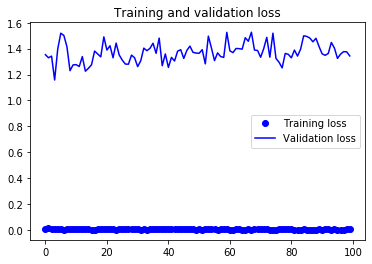

In [25]:
import matplotlib as mpl
import matplotlib.pylab as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [26]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 77 images belonging to 7 classes.
test acc: 0.9470954286359653
